# Evaluating Model

In [36]:
#Importing libraries
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report
from tensorflow import keras
import matplotlib.pyplot as plt
import sklearn.metrics
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from reader import get_images
from keras import utils
from sklearn.model_selection import train_test_split
import itertools

## Data Preprocessing

In [42]:
model_path = 'train_model_4CNN.hdf5'
if "xcep" in model_path.split("_"):
    target_size = (150, 150)
    model = tf.keras.models.load_model(model_path, custom_objects={"target_size": target_size})
else:
    model = tf.keras.models.load_model(model_path)

In [38]:
#import dataset
(x_train, y_train_raw), (x_test, y_test_raw) = get_images() 
    
if "inception" in model_path.split("_"):
    print("using model requiring 3 image channels")
    #convert training and test images into three channels
    x_train = np.dstack([x_train]*3)
    x_test = np.dstack([x_test]*3)

    # Reshape data to image's dimension 28 by 28
    x_train = x_train.reshape(-1,28,28,3)
    x_test = x_test.reshape(-1,28,28,3)

    x_train = x_train.astype(np.float32)
    x_test = x_test.astype(np.float32)

else:
    # Reshape data to image's dimension 28 by 28
    x_train = x_train.reshape(-1,28,28)
    x_test = x_test.reshape(-1,28,28)

    #add another dimension to the data
    x_train = np.expand_dims(x_train, axis=3)
    x_test = np.expand_dims(x_test, axis=3)
    x_train.shape , x_test.shape

    x_train = x_train.astype(np.float32)
    x_test = x_test.astype(np.float32)


C:\Users\tansi\Projects\ICDSS-FashionMNIST\reader.py:38: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  x_train = df_train.drop('label', axis=1).as_matrix().astype(np.uint8)
C:\Users\tansi\Projects\ICDSS-FashionMNIST\reader.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y_train = df_train['label'].as_matrix().astype(np.uint8)
C:\Users\tansi\Projects\ICDSS-FashionMNIST\reader.py:40: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  x_test = df_test.drop('label', axis=1).as_matrix().astype(np.uint8)
C:\Users\tansi\Projects\ICDSS-FashionMNIST\reader.py:41: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y_test = df_test['label'].as_matrix().astype(np.uint8)


In [39]:
#Change classes to a categorical type
num_classes = 10
y_train = utils.to_categorical(y_train_raw, num_classes)
y_test = utils.to_categorical(y_test_raw, num_classes)

# split original training data to 80 % training data and the other 20% for validation data
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=13)

# Check the data size
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

## Classification Report

In [40]:
# get the predictions for the test data
predicted_classes = np.argmax(model.predict(x_test),axis=1)
incorrects = np.flatnonzero(predicted_classes != y_test_raw)
corrects = np.flatnonzero(predicted_classes == y_test_raw)

In [43]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

class_names = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
#target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_test_raw, predicted_classes, target_names=class_names))

Test loss: 8.609857142587325
Test accuracy: 0.9115
              precision    recall  f1-score   support

     t_shirt       0.83      0.88      0.86      1000
     trouser       0.99      0.98      0.98      1000
    pullover       0.89      0.84      0.87      1000
       dress       0.89      0.93      0.91      1000
        coat       0.83      0.88      0.85      1000
      sandal       0.97      0.98      0.98      1000
       shirt       0.78      0.70      0.73      1000
     sneaker       0.94      0.98      0.96      1000
         bag       0.98      0.99      0.98      1000
 ankle_boots       0.99      0.94      0.96      1000

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



## Confusion Matrix

Text(0.5, 0, 'Predicted label')

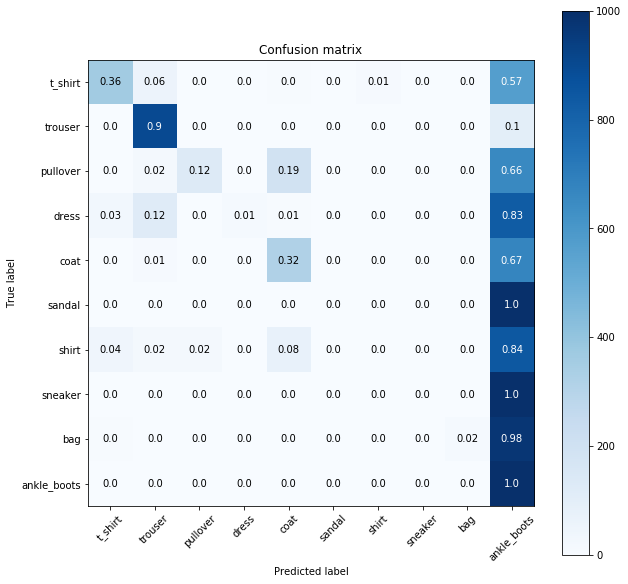

In [35]:
# Calculate the confusion matrix.
cm = sklearn.metrics.confusion_matrix(y_test_raw, predicted_classes)
# Log the confusion matrix as an image summary.

figure = plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.ylim(len(cm)-0.5, -0.5)

# Normalize the confusion matrix.
cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

# Use white text if squares are dark; otherwise black.
threshold = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    color = "white" if cm[i, j] > threshold else "black"
    plt.text(j, i, cm[i, j], ha="center", va="center",color=color)

#plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Viewing correct and Incorrect answers

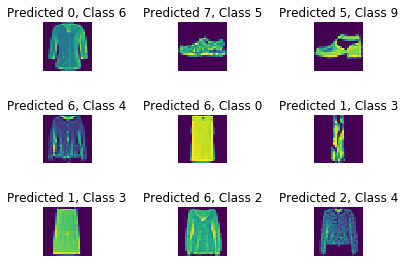

In [23]:
for i, incorrect in enumerate(incorrects[:9]):
    plt.subplot(3,3,i+1)
    plt.axis('Off') 
    plt.imshow(x_test[incorrect].reshape(28,28), interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test_raw[incorrect]))
    plt.tight_layout()

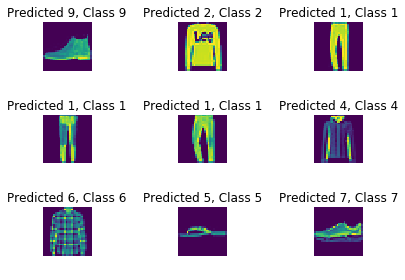

In [24]:
for i, correct in enumerate(corrects[:9]):
    plt.subplot(3,3,i+1)
    plt.axis('Off') 
    plt.imshow(x_test[correct].reshape(28,28), interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test_raw[correct]))
    plt.tight_layout()

## Viewing Intermediate activation layers (4CNN model)

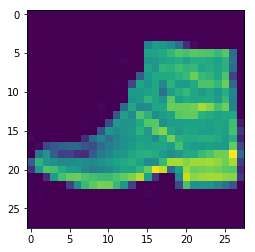

In [25]:
test_im = x_train[2018]
plt.imshow(test_im.reshape(28,28), cmap='viridis', interpolation='none')
plt.show()

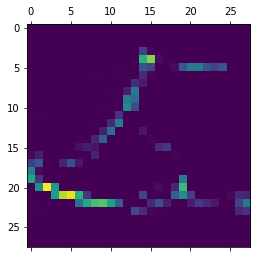

In [26]:
# extracts the outputs of the top 8 layers
layer_outputs = [layer.output for layer in model.layers[:8]]

# creates a model that will return these outputs, given the model input
activation_model = tf.keras.Model(inputs=model.input, outputs=layer_outputs)

# returns a list of Numpy arrays: one array per layer activation
activations = activation_model.predict(test_im.reshape(1,28,28,1))

# activation of the 1st convolution layer
first_layer_activation = activations[0]

# display the 1st channel of the activation of the 1st layer of the original model
plt.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')


C:\Users\tansi\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
C:\Users\tansi\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


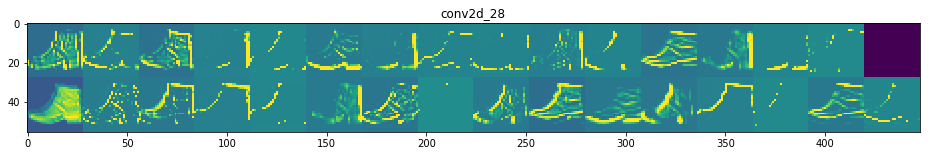

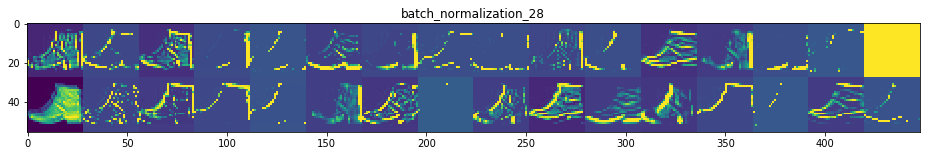

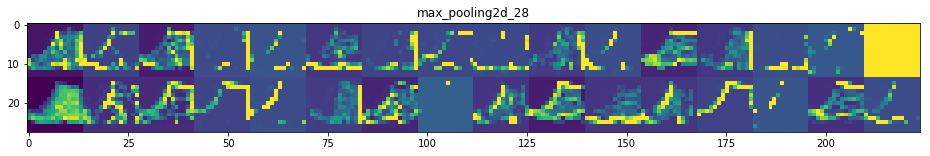

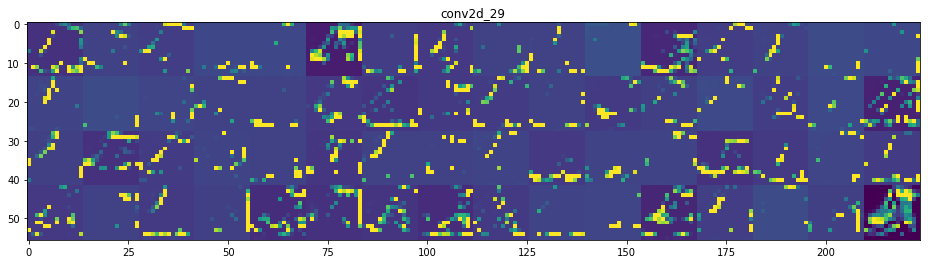

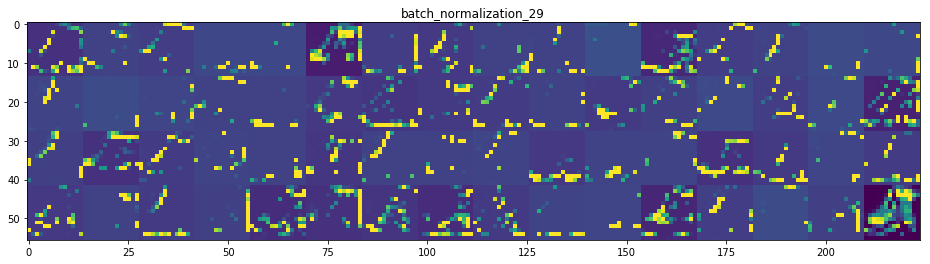

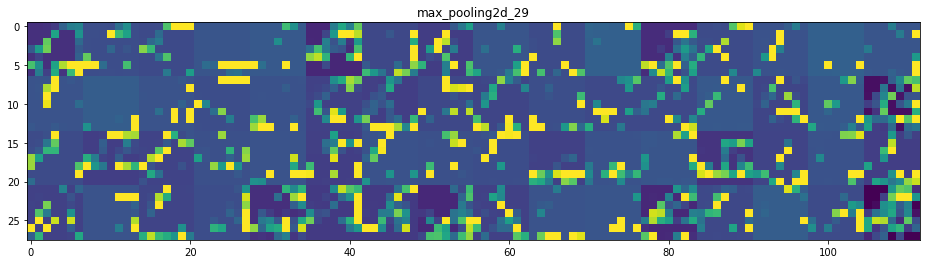

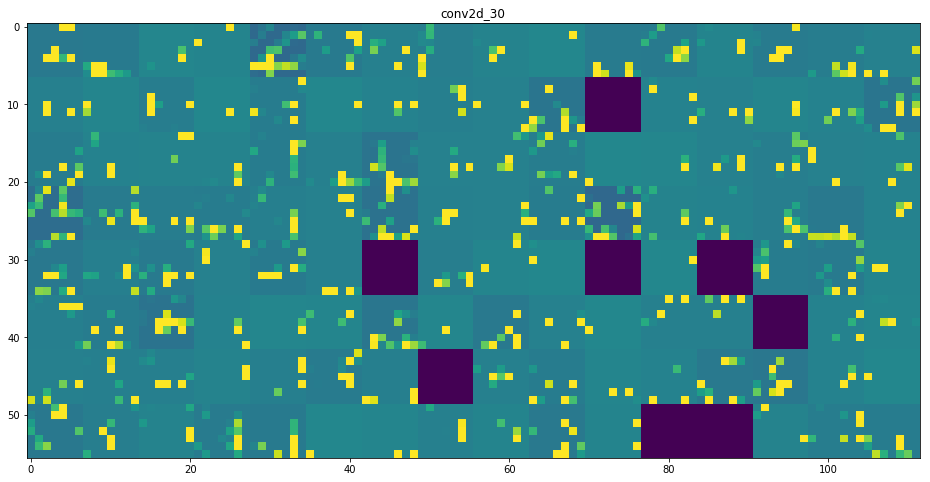

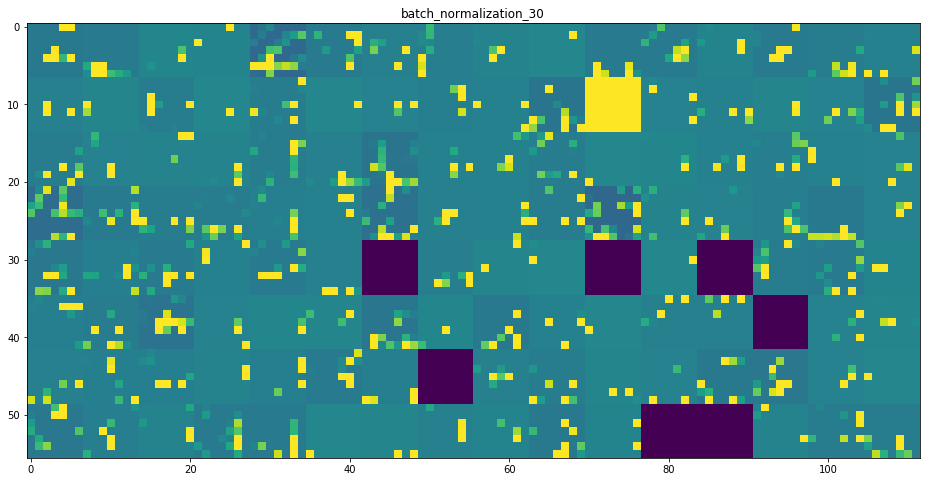

In [27]:
layer_names = []
for layer in model.layers[:12]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')